In [5]:
import pandas as pd
import numpy as np
import keras
from keras import layers

Upload the labels.csv and processed_counts.csv files to colab or your local workspace.

**Copied from Part 1:**
This data associates a cell barcode, such as "AAAGCCTGGCTAAC-1", to a certain cell type label, such as "CD14+ Monocyte". For each cell barcode, there are also log RNA seq counts of 765 different genes, such as HES4.

label.csv stores the association between a cell barcode and a cell type label.

processed_counts.csv stores the normalized log read counts for each cell, where each row represents a single cell, and each column represents a gene.

In [6]:
labels_pd = pd.read_csv("labels.csv")
counts_pd = pd.read_csv("processed_counts.csv")

In [7]:
labels_pd.index = labels_pd['index']
labels_pd.drop("index", axis=1, inplace=True)
counts_pd.index = counts_pd['Unnamed: 0']
counts_pd.drop("Unnamed: 0", axis=1, inplace=True)

df = counts_pd.merge(labels_pd, left_index=True, right_index=True).dropna()
df

,HES4,TNFRSF4,SSU72,PARK7,RBP7,SRM,MAD2L2,AGTRAP,TNFRSF1B,EFHD2,NECAP2,HP1BP3,C1QA,C1QB,HNRNPR,GALE,STMN1,CD52,FGR,ATPIF1,SESN2,EIF3I,LCK,MARCKSL1,SFPQ,PSMB2,MEAF6,NDUFS5,CAP1,SMAP2,C1orf228,PRDX1,TMEM69,SCP2,MAGOH,JAK1,CCBL2,GBP2,CD53,DENND2D,...,ZNF600,ZNF524,CTD-3138B18.5,ATP6V1E1,BID,MRPL40,UFD1L,COMT,DGCR6L,SDF2L1,IGLL5,IGLL1,CHCHD10,SMARCB1,MIF,ASCC2,PIK3IP1,HMOX1,EIF3D,IL2RB,LGALS2,EIF3L,ADSL,RBX1,TTC38,TYMP,CCT8,SOD1,PAXBP1,ATP5O,MRPS6,TTC3,U2AF1,CSTB,SUMO3,ITGB2,S100B,PRMT2,MT-ND3,cell type
AAAGCCTGGCTAAC-1,-0.326,-0.191,-0.728,-0.301,3.386,-0.531,2.016,3.377,4.841,-0.525,-0.525,1.804,0.578,-0.198,1.266,-0.192,-0.307,0.048,-0.606,0.478,-0.07,-0.864,-0.534,-0.504,-0.509,-0.727,-0.646,0.336,-0.017,4.381,-0.251,0.235,-0.252,-0.701,-0.537,-0.684,-0.244,-0.421,0.575,-0.375,...,-0.109,-0.402,-0.122,-0.583,-0.690,-0.487,-0.582,-0.630,-0.507,0.697,-0.133,-0.062,1.777,0.948,0.436,-0.345,-0.418,0.652,0.351,-0.196,-0.413,-0.323,-0.491,-0.719,-0.205,-0.092,-0.694,-0.070,-0.116,-0.146,-0.532,-0.341,0.303,1.404,4.294,0.519,-0.210,-0.636,4.011,Monocytes
AAATTCGATGCACA-1,1.171,-0.191,0.795,-1.200,-0.174,-0.531,1.889,-0.486,-0.459,-0.525,1.287,-0.420,0.954,2.367,1.170,-0.192,-0.307,0.266,0.629,-0.802,-0.07,-0.864,-0.534,0.873,-0.509,0.645,-0.646,0.274,0.856,1.845,-0.251,-0.796,-0.252,-0.701,1.581,-0.684,-0.244,-0.421,-0.282,-0.375,...,-0.109,-0.402,-0.122,-0.583,2.992,1.327,-0.582,0.991,-0.507,0.636,-0.133,-0.062,-0.687,-0.497,0.373,-0.345,-0.418,-0.366,1.496,-0.196,-0.413,0.478,-0.491,-0.719,-0.205,1.089,-0.694,-0.120,-0.116,-1.136,-0.532,-0.341,-0.905,2.849,-0.585,1.172,-0.210,2.630,-0.490,Monocytes
AACACGTGGTCTTT-1,-0.326,-0.191,0.483,-1.200,-0.174,-0.531,-0.451,0.971,-0.459,2.286,-0.525,1.258,-0.310,-0.198,-0.602,-0.192,-0.307,-0.462,1.358,-0.802,-0.07,0.205,-0.534,-0.504,-0.509,0.364,-0.646,-0.881,-0.256,-0.445,-0.251,-0.796,-0.252,0.480,2.831,1.528,-0.244,0.816,-0.440,1.583,...,-0.109,-0.402,-0.122,-0.583,-0.690,-0.487,-0.582,-0.630,-0.507,-0.502,-0.133,-0.062,-0.687,-0.497,-0.782,-0.345,-0.418,-0.366,0.037,5.397,-0.413,0.131,1.310,-0.719,-0.205,-0.733,1.747,0.428,-0.116,-1.136,2.606,-0.341,-0.905,-0.455,-0.585,0.722,-0.210,0.663,-0.490,NK
AAGTGCACGTGCTA-1,-0.326,-0.191,1.134,-0.157,-0.174,-0.531,-0.451,-0.486,-0.459,-0.525,-0.525,9.900,-0.310,-0.198,1.565,-0.192,2.270,1.258,-0.606,-0.802,-0.07,-0.864,0.741,-0.504,2.193,2.630,1.627,-0.881,-0.990,-0.445,-0.251,-0.796,-0.252,1.114,-0.537,-0.684,-0.244,1.481,2.728,-0.375,...,-0.109,-0.402,-0.122,-0.583,-0.690,-0.487,-0.582,-0.630,-0.507,-0.502,-0.133,-0.062,-0.687,-0.497,-0.782,-0.345,-0.418,-0.366,2.036,-0.196,-0.413,-0.180,-0.491,-0.719,-0.205,-0.733,-0.694,1.221,-0.116,1.161,-0.532,-0.341,-0.905,-0.119,-0.585,0.766,-0.210,-0.636,-0.490,T-cell
ACACGAACGGAGTG-1,-0.326,-0.191,-0.728,-0.607,-0.174,-0.531,-0.451,0.787,-0.459,1.932,-0.525,1.046,-0.310,-0.198,0.630,-0.192,-0.307,-0.546,1.110,1.730,-0.07,1.005,-0.534,-0.504,-0.509,-0.727,-0.646,-0.881,0.293,-0.445,-0.251,-0.796,-0.252,1.363,2.407,0.283,-0.244,-0.421,-0.518,-0.375,...,-0.109,-0.402,-0.122,-0.583,-0.690,-0.487,-0.582,-0.630,-0.507,-0.502,-0.133,-0.062,-0.687,-0.497,0.824,-0.345,-0.418,0.306,-0.926,-0.196,3.847,1.138,-0.491,0.213,-0.205,-0.310,-0.694,-1.048,-0.116,-1.136,0.839,1.679,-0.108,-0.534,-0.585,-0.007,-0.210,-0.636,-0.490,Dendritic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAGAGATGTCCC-3,-0.326,2.629,-0.728,1.688,-0.174,-0.531,-0.451,-0.486,-0.459,-0.525,-0.525,-0.420,-0.310,-0.198,-0.602,-0.192,-0.307,1.233,-0.606,-0.802,-0.07,-0.864,-0.534,0.662,-0.509,-0.727,-0.646,0.097,-0.990,-0.445,2.369,-0.796,-0.252,-0.701,-0.537,-0.684,-0.244,-0.421,-0.400,1.709,...,-0.109,1.699,-0.122,-0.583,-0.690,-0.487,0.925,-0.630,-0.507,2.387,-0.133,

One-hot encode the cell-type.

Shuffle your data. Make sure your labels and the counts are shuffled together.

Split into train and test sets (80:20 split)

In [8]:
categories = df['cell type'].unique()
print(categories)

#one-hot encoding
y = np.zeros((len(df), len(categories)))
for i in range(len(df)):
  cell_type = df.iloc[i]['cell type']
  pos = np.where(categories == cell_type)[0]
  y[i, pos] = 1

#remove label when processing input data
X = df.drop('cell type', axis=1).values

#shufle and 80:20 split
np.random.seed(100)
permutation = np.random.permutation(len(X))
X, y = X[permutation], y[permutation]

X_train, y_train = X[:int(len(X)*0.8)], y[:int(len(y)*0.8)]
X_test, y_test = X[int(len(X)*0.8):], y[int(len(y)*0.8):]

['Monocytes' 'NK' 'T-cell' 'Dendritic' 'Plasma' 'B-cell' 'Other']


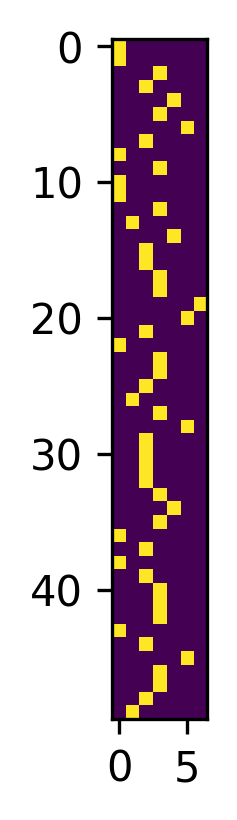

In [17]:
#Visualize the One-hot encoded Prediction Labels
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3), dpi=300)
plt.imshow(y_train[:50])

Apply classification algorithms to the training data, tune on validation data (if present), and evaluate on test data.

You can also apply classification downstream of last week's autoencoder latent space representation.